# SciPy

SciPy создана для работы с массивами NumPy и предоставляет множество удобных и эффективных численных методов, таких как процедуры численной интеграции и оптимизации.

### Экспоненциальные и тригонометрические функции

In [2]:
from scipy import special
a = special.exp10(3)
print(a)
 
b = special.exp2(3)
print(b)
 
c = special.sindg(90)
print(c)
 
d = special.cosdg(45)
print(d)

1000.0
8.0
1.0
0.7071067811865475


### Интерполяция

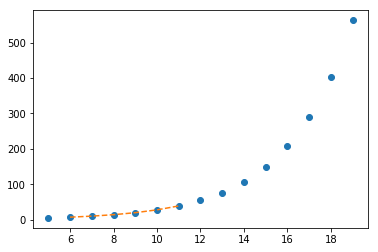

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(5, 20)
y = np.exp(x/3.0)
f = interpolate.interp1d(x, y)
x1 = np.arange(6, 12)
y1 = f(x1)   # использовать функцию интерполяции, возвращаемую `interp1d`
plt.plot(x, y, 'o', x1, y1, '--')
plt.show()

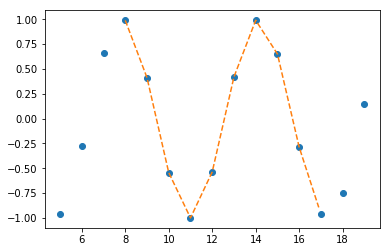

In [12]:
x = np.arange(5, 20, 1)
y = np.sin(x)
f = interpolate.interp1d(x, y)
x1 = np.arange(8, 17, 0.1)
y1 = f(x1)
plt.plot(x, y, 'o', x1, y1, '--')
plt.show()

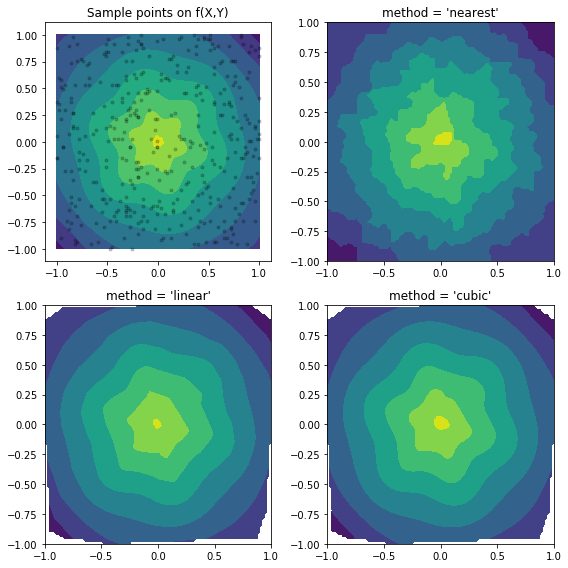

In [13]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title("method = '{}'".format(method))

plt.tight_layout()
plt.show()

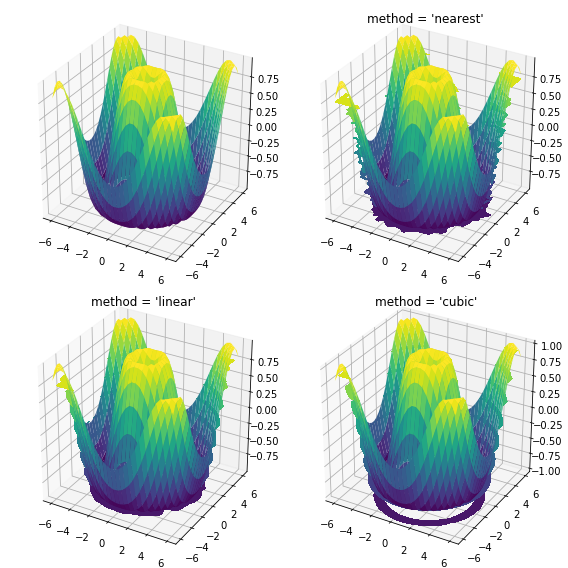

In [86]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x,y)

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

T = f(X, Y)
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), subplot_kw=dict(projection='3d'))
ax[0,0].plot_surface(X, Y, T, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].plot_surface(X, Y, T, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title("method = '{}'".format(method))

plt.tight_layout()
plt.show()

### Триангуляции Делоне

С математической точки зрения триангуляции Делоне для набора дискретных точек на плоской поверхности — это триангуляция, где ни одна точка из представленных не расположена внутри описанной окружности любого треугольника.

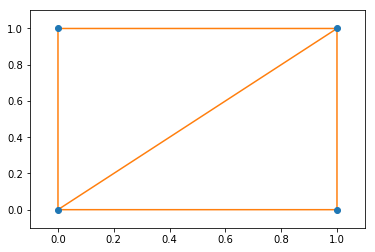

In [90]:
from scipy.spatial import Delaunay, delaunay_plot_2d
points = np.array([[0, 1], [1, 1], [1, 0],[0, 0]])
tri = Delaunay(points)       # Объект Делоне
_ = delaunay_plot_2d(tri)
plt.show()

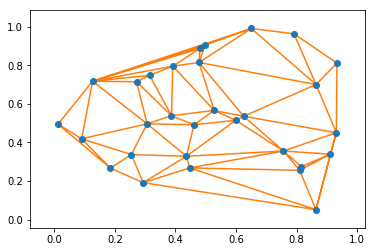

In [91]:
points = np.random.rand(30, 2)
tri = Delaunay(points)
_ = delaunay_plot_2d(tri)
plt.show()

### Выпуклые корпуса

В математике выпуклая оболочка или выпуклая оболочка множества точек X в евклидовой плоскости или в евклидовом пространстве (или, в более общем случае, в аффинном пространстве над реалами) является наименьшим выпуклым множеством , содержащим X.

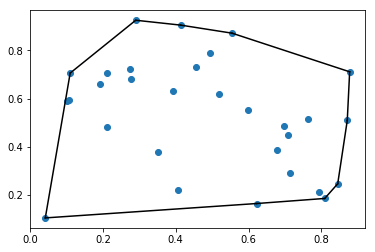

In [95]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

### Обнаружение края

Обнаружение краев — это метод обработки изображений для определения границ объектов в изображениях. Это работает, обнаруживая разрывы в яркости. Обнаружение края используется для сегментации изображения и извлечения данных в таких областях, как обработка изображений, компьютерное зрение и машинное зрение.

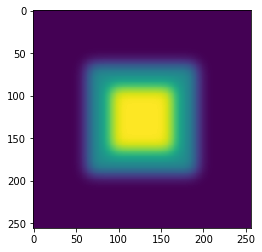

In [97]:
import scipy.ndimage as nd

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1
im[90:-90,90:-90] = 2
im = nd.gaussian_filter(im, 8)

plt.imshow(im)
plt.show()

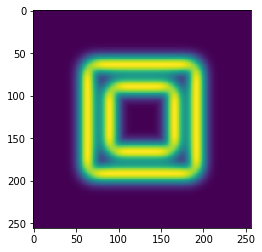

In [99]:
sx = nd.sobel(im, axis = 0, mode = 'constant')
sy = nd.sobel(im, axis = 1, mode = 'constant')
sob = np.hypot(sx, sy)

plt.imshow(sob)
plt.show()

### Улучшение качества изображения

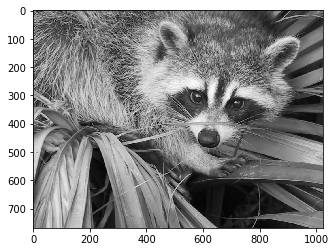

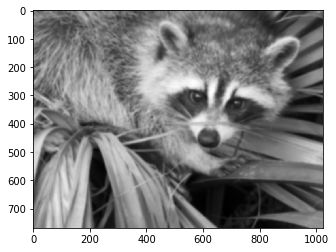

In [129]:
from scipy import misc
face = misc.face(gray=True).astype(float)
plt.imshow(face, cmap=plt.cm.gray)
plt.show()
blurred_f = nd.gaussian_filter(face, 3)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.show()

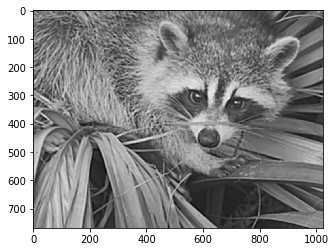

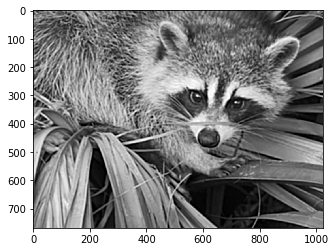

In [142]:
filter_blurred_f = nd.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.show()
plt.imshow(sharpened, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.show()

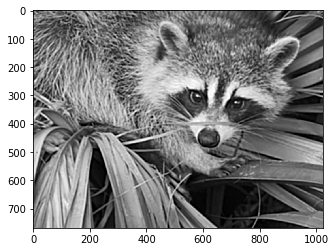

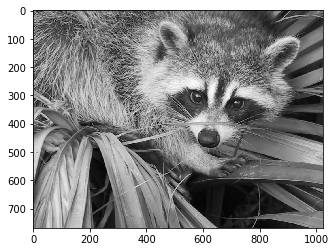

In [145]:
plt.imshow(sharpened, cmap=plt.cm.gray, vmin=0, vmax=255, interpolation='nearest')
plt.show()
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

---------------------

In [1]:
from sympy import symbols

x, y = symbols('x y')

a = x + y + x
print(a)

a -= x
print(a)

a += (5*y + 12)
print(a)

2*x + y
x + y
x + 6*y + 12


In [3]:
x = symbols('x')

f = x**2 + 5*x + 1
print(f)
print(f.evalf(subs={x: 2}))

print((x + x + x).evalf(subs={x : 1}))

x**2 + 5*x + 1
15.0000000000000
3.00000000000000


In [4]:
from sympy import Eq, solve

x = symbols('x')

f = x**2 + 5 * x + 1
e = Eq(f, 1)
print(e)
print(solve(e))

print("==================")

a = symbols('a')
f2 = x**2 + a * a * x
e2 = Eq(f2, 0)
print(e2)
print(solve(e2))
print(solve(e2, x))

Eq(x**2 + 5*x + 1, 1)
[-5, 0]
Eq(a**2*x + x**2, 0)
[{a: -sqrt(-x)}, {a: sqrt(-x)}, {x: 0}]
[0, -a**2]


In [8]:
from scipy import linalg
import numpy as np

a = np.array([[3, 2, 0],
     [1, -1, 0],
     [0, 5, 1]])

b = np.array([2, 4, -1])

# Решает систему линейных скалярных уравнений
x = linalg.solve(a, b)

print(x)
print(a @ x - b)

[ 2. -2.  9.]
[0. 0. 0.]


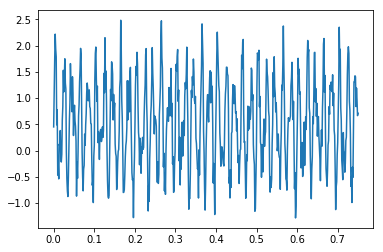

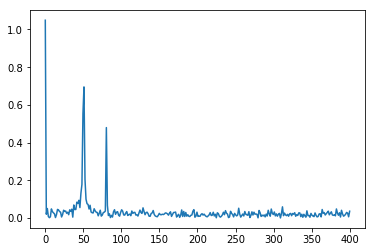

In [9]:
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.matplotlib_fname()

T = 1.0 / 800.0
N = 600

x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + np.random.random((N,1)).flatten()

plt.plot(x, y)
plt.show()

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()